In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import metrics

In [ ]:
# Step 1: Generate data
np.random.seed(42)
num_samples = 10000
x = np.random.uniform(-30, 30, num_samples)
y = 5 * x**3 - 10 * x**2 - 20 * x + 10

# Normalize data to [-1, 1]
x_normalized = 2 * (x - np.min(x)) / (np.max(x) - np.min(x)) - 1
y_normalized = 2 * (y - np.min(y)) / (np.max(y) - np.min(y)) - 1

In [ ]:
# Split data
indices = np.arange(num_samples)
np.random.shuffle(indices)

train_size = int(0.9 * num_samples)
val_size = int(0.05 * num_samples)

data_train_x = x_normalized[indices[:train_size]]
data_train_y = y_normalized[indices[:train_size]]
data_val_x = x_normalized[indices[train_size:train_size + val_size]]
data_val_y = y_normalized[indices[train_size:train_size + val_size]]
data_test_x = x_normalized[indices[train_size + val_size:]]
data_test_y = y_normalized[indices[train_size + val_size:]]

In [ ]:
# Step 2: Build the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=[metrics.R2Score(name='accuracy')])


# Display model summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8075 - loss: 0.0287 - val_accuracy: 0.9986 - val_loss: 1.9292e-04
Epoch 2/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9988 - loss: 1.7175e-04 - val_accuracy: 0.9997 - val_loss: 3.5625e-05
Epoch 3/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 3.0880e-05 - val_accuracy: 0.9998 - val_loss: 2.9839e-05
Epoch 4/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 1.5862e-05 - val_accuracy: 0.9999 - val_loss: 1.0040e-05
Epoch 5/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 1.1352e-05 - val_accuracy: 1.0000 - val_loss: 6.0723e-06
Epoch 6/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.8127e-06 - val_accuracy: 1.0000 - val_loss: 3.2513e-06
Epoch 7/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 1.0874e-05 - val_accuracy: 1.0000 - val_loss: 3.6963e-06
Epoch 8/20
282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

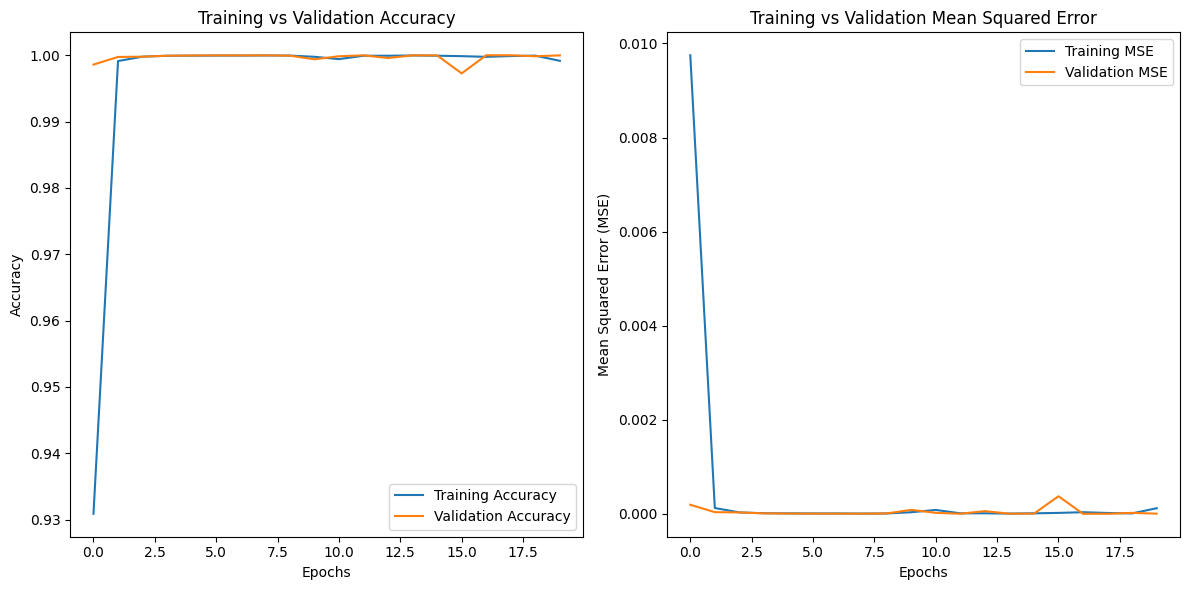

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 4.0703e-06 
Test Loss (MSE): 0.0000, Test MAE: 1.0000


In [ ]:
# Step 3: Train the model
history = model.fit(
    data_train_x, data_train_y,
    validation_data=(data_val_x, data_val_y),
    epochs=20,
    batch_size=32
)

# Step 4: Plot results
plt.figure(figsize=(12, 6))

# Plot accuracy (mae)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss (mse)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Training vs Validation Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test data
test_loss, test_mae = model.evaluate(data_test_x, data_test_y)
print(f"Test Loss (MSE): {test_loss:.4f}, Test MAE: {test_mae:.4f}")
